<a href="https://colab.research.google.com/github/arumugammani02/Task_6/blob/main/Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [ ]:
print(df.shape)


(15, 2)


In [ ]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [ ]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [ ]:
df.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

In [ ]:
df.drop_duplicates()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [ ]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [ ]:
IQR =df['Ground Temperature'].quantile(0.80) - df['Ground Temperature'].quantile(0.25)
upper_threshold = df['Ground Temperature'].quantile(0.80)+(1.5*IQR)
lower_threshold = df['Ground Temperature'].quantile(0.25)-(1.5*IQR)
if upper_threshold > df['Ground Temperature'].max():
  print('No outliers in upper threshold range')
else:
    print('outliers in upper threshold range')
if lower_threshold > df['Ground Temperature'].min():
    print('No outliers in lower threshold range')
else:
    print('outliers in lower threshold range')

No outliers in upper threshold range
outliers in lower threshold range


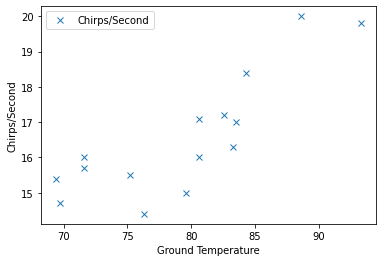

In [ ]:
#EDA

df.plot( y = 'Chirps/Second', x = 'Ground Temperature',style='x')
plt.ylabel('Chirps/Second')
plt.xlabel('Ground Temperature')
plt.show()

In [ ]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


In [ ]:
#Split the data for train and test data

X = df[['Ground Temperature']].values
y = df[['Chirps/Second']].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=0)

In [ ]:
X_train.shape

(9, 1)

In [ ]:
X_test.shape

(6, 1)

In [ ]:
y_train.shape

(9, 1)

In [ ]:
y_test.shape

(6, 1)

In [ ]:
#Model

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

 **1.Find the linear regression equation for this data.**




In [ ]:
# C-value
reg.intercept_

array([-3.16526416])

In [ ]:
#M-value
reg.coef_

array([[0.24764964]])

**2.Chart the original data and the equation on the chart.**

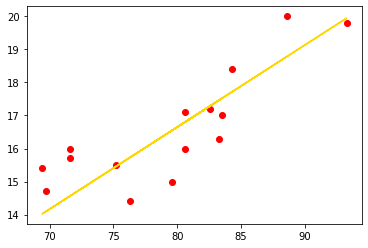

In [ ]:
plt.scatter(X,y,color='red')
plt.plot(X,reg.predict(X),color='gold')
plt.show()

**3**.**Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)**

In [ ]:
y_predict = reg.predict(X_test)


In [ ]:
from sklearn import metrics
metrics.r2_score(y_test,y_predict)

-0.45652391575429596

**4.Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?**

In [ ]:
print(reg.predict([[95]]))

[[20.36145146]]


When the ground temperature reached 95, thenthe crickets would be chirping at rate of 20.36

**5.Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?**

In [ ]:
(18 - reg.intercept_)/reg.coef_

array([[85.4645471]])

Particular morning the crickets were chirping at a rate of 18 chirps per second. The approximate ground temperature that morning is 85.46

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
df = pd.read_fwf("brain_body.txt")

In [ ]:
df.shape

(62, 2)

In [ ]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [ ]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [ ]:
df.drop_duplicates()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [ ]:
#detecting outliers
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


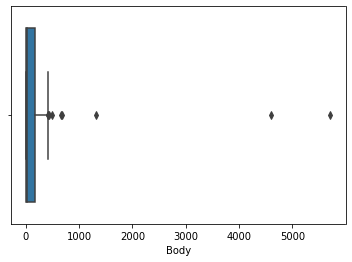

In [ ]:
import seaborn as sns
sns.boxplot(df['Body'])

In [ ]:
IQR = df['Body'].quantile(0.75) - df['Body'].quantile(0.25)
upper_threshold = df['Body'].quantile(0.75) + (1.5 * IQR)
lower_threshold = df['Body'].quantile(0.25) - (1.5 * IQR)
if upper_threshold > df['Body'].max():
  print("No outliers in upper threshold")
else:
  print("Outliers in upper threshold")
if lower_threshold < df['Body'].min():
  print("No outliers in lower threshold")
else:
  print("Outliers in lower threshold")
  

Outliers in upper threshold
No outliers in lower threshold


In [ ]:
#Removing outliers
max_threshold = df['Body'].quantile(0.95)
min_threshold = df['Body'].quantile(0.05)

In [ ]:
df = df[(df['Body']<max_threshold) & (df['Body']>min_threshold)]

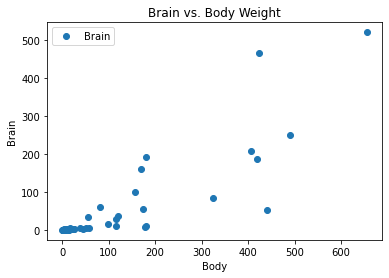

In [ ]:
df.plot(x='Body',y='Brain',style='o')
plt.xlabel('Body')
plt.ylabel("Brain")
plt.title("Brain vs. Body Weight")
plt.show()

In [ ]:
df.corr()

,Brain,Body
Brain,1.00000,0.85416
Body,0.85416,1.00000


In [ ]:
X = df[['Body']].values
y = df['Brain'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=200)


**1.Find the linear regression equation for this data for brain weight to body weight.**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
print('Linear Regression Equation: y={:.3f} X + {:.3f}'.format(lr.coef_[0],lr.intercept_) )

Linear Regression Equation: y=0.729 X + -15.170


**2.Chart the original data and the equation on the chart.**

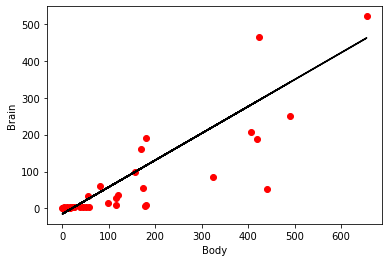

In [ ]:
plt.scatter(X,y,color='red')
plt.plot(X,lr.predict(X),color='k')
plt.xlabel('Body')
plt.ylabel('Brain')
plt.show()

**3.Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)**

In [ ]:
y_predict = lr.predict(X_test)

In [ ]:
from sklearn import metrics

print('R2 score: ',metrics.r2_score(y_test,y_predict))

R2 score:  0.04268224638395113


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [ ]:
df.shape

(52, 6)

In [ ]:
df

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


In [ ]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sex     52 non-null     int64
 1   Rank    52 non-null     int64
 2   Year    52 non-null     int64
 3   Degree  52 non-null     int64
 4   YSdeg   52 non-null     int64
 5   Salary  52 non-null     int64
dtypes: int64(6)
memory usage: 2.6 KB


In [ ]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of     Sex  Rank  Year  Degree  YSdeg  Salary
0     0     3    25       1     35   36350
1     0     3    13       1     22   35350
2     0     3    10       1     23   28200
3     1     3     7       1     27   26775
4     0     3    19       0     30   33696
5     0     3    16       1     21   28516
6     1     3     0       0     32   24900
7     0     3    16       1     18   31909
8     0     3    13       0     30   31850
9     0     3    13       0     31   32850
10    0     3    12       1     22   27025
11    0     2    15       1     19   24750
12    0     3     9       1     17   28200
13    0     2     9       0     27   23712
14    0     3     9       1     24   25748
15    0     3     7       1     15   29342
16    0     3    13       1     20   31114
17    0     2    11       0     14   24742
18    0     2    10       0     15   22906
19    0     3     6       0     21   24450
20    0     1    16       0     23   19175
21    0    

In [ ]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [ ]:
Q1 = df.quantile(0.25)
Q2 = df.quantile(0.75)
iqr = Q2 - Q1
((df<(Q1 - 1.5*iqr)) | (df>(Q2 + 1.5 *iqr))).sum()

Sex       0
Rank      0
Year      1
Degree    0
YSdeg     0
Salary    0
dtype: int64

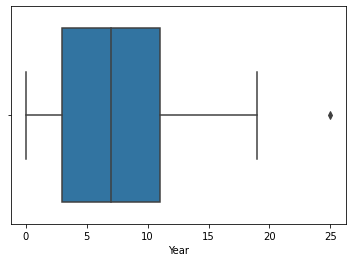

In [ ]:
sns.boxplot(x = df['Year'])
plt.show()

**1.Find the linear regression equation for this data using columns 1-5 to column 6.**

In [ ]:
X =df[['Sex','Rank','Year','Degree','YSdeg']].values
y = df['Salary'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)

StandardScaler()

In [ ]:
X_train_scalar = ss.transform(X_train)
X_test_scalar = ss.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scalar,y_train)

LinearRegression()

In [ ]:
print('Linear Regression Equation : y = {:.3f} + {:.3f} x1 + {:.3f} x2 + {:.3f} x3 + {:.3f} x4 + {:.3f} x5 '.format(lr.intercept_ , lr.coef_[0],lr.coef_[1],lr.coef_[2],lr.coef_[3],lr.coef_[4]))

Linear Regression Equation : y = 23536.056 + 362.095 x1 + 4712.503 x2 + 2176.637 x3 + -960.074 x4 + -1895.934 x5 


**2.Find the selection of columns with the best  R2  score.**

In [ ]:
y_predict = lr.predict(X_test_scalar)

In [ ]:
from sklearn import metrics

In [ ]:
print('R2 score is:',metrics.r2_score(y_test,y_predict))

R2 score is: 0.7536306324236721


In [ ]:
def combinations(F):
  if F:
    result = combinations(F[:-1])
    return result + [i+[F[-1]] for i in result]
  else:
    return [[]]
comb = combinations (['Sex','Rank','Year','Degree','YSdeg'])
comb = comb[1:]
print(comb)

[['Sex'], ['Rank'], ['Sex', 'Rank'], ['Year'], ['Sex', 'Year'], ['Rank', 'Year'], ['Sex', 'Rank', 'Year'], ['Degree'], ['Sex', 'Degree'], ['Rank', 'Degree'], ['Sex', 'Rank', 'Degree'], ['Year', 'Degree'], ['Sex', 'Year', 'Degree'], ['Rank', 'Year', 'Degree'], ['Sex', 'Rank', 'Year', 'Degree'], ['YSdeg'], ['Sex', 'YSdeg'], ['Rank', 'YSdeg'], ['Sex', 'Rank', 'YSdeg'], ['Year', 'YSdeg'], ['Sex', 'Year', 'YSdeg'], ['Rank', 'Year', 'YSdeg'], ['Sex', 'Rank', 'Year', 'YSdeg'], ['Degree', 'YSdeg'], ['Sex', 'Degree', 'YSdeg'], ['Rank', 'Degree', 'YSdeg'], ['Sex', 'Rank', 'Degree', 'YSdeg'], ['Year', 'Degree', 'YSdeg'], ['Sex', 'Year', 'Degree', 'YSdeg'], ['Rank', 'Year', 'Degree', 'YSdeg'], ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']]


In [ ]:
R2_Score = []
for i in comb:
    X = df[i].values
    y = df.loc[:,'Salary'].values
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=200)
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train) 
    X_test_scaled = scaler.transform(X_test)
    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(X_train_scaled,y_train)
    y_predict = regressor.predict(X_test_scaled)
    from sklearn import metrics
    R2_Score.append(metrics.r2_score(y_test,y_predict))

In [ ]:
df1 = pd.DataFrame({'Feature Combination':comb,'R2 Score':R2_Score})
df1

,Feature Combination,R2 Score
0,[Sex],-0.175373
1,[Rank],0.789212
2,"[Sex, Rank]",0.791057
3,[Year],0.530712
4,"[Sex, Year]",0.300938
5,"[Rank, Year]",0.874225
6,"[Sex, Rank, Year]",0.800191
7,[Degree],-0.391957
8,"[Sex, Degree]",-0.207092
9,"[Rank, Degree]",0.795871


**3.Report whether sex is a factor in salary.**

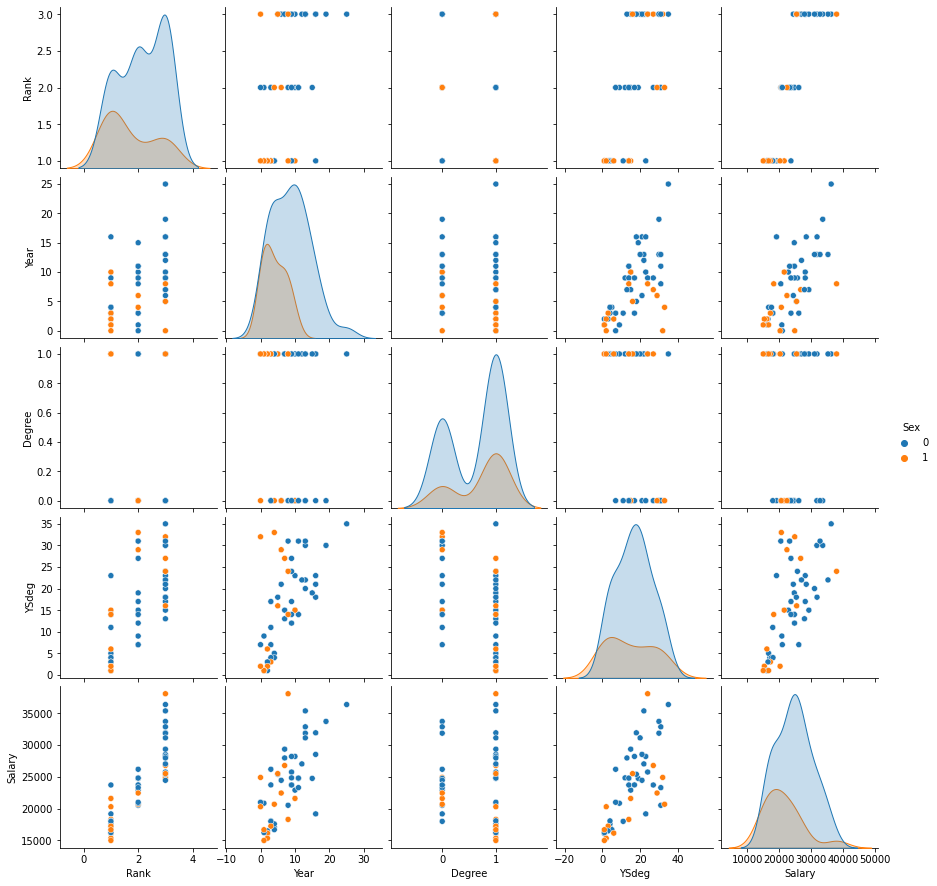

In [ ]:
sns.pairplot(df,hue='Sex')

In [ ]:
coeff_df = pd.DataFrame(lr.coef_,['Sex','Rank','Year','Degree','YSdeg'],columns = ['Coefficient'])
coeff_df

,Coefficient
Sex,362.094832
Rank,4712.503298
Year,2176.636515
Degree,-960.074174
YSdeg,-1895.933741


In [ ]:
df.corr()

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000


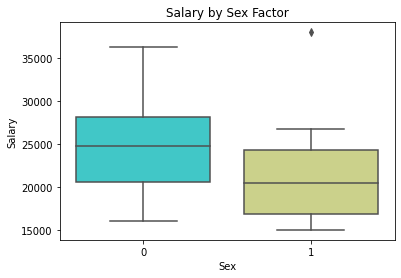

In [ ]:
import seaborn as sns
sns.boxplot(data=df, x="Sex", y="Salary",palette='rainbow')
plt.title('Salary by Sex Factor')
plt.show()

In [ ]:
df[['Sex','Salary']].corr()

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


In [ ]:
num_by_sex = df.Sex.value_counts()
print('men: {}\nwomen: {}'.format(num_by_sex[0], num_by_sex[1]))

men: 38
women: 14
